#### SVM算法应用于face数据集

In [4]:
import numpy as np
from sklearn.datasets import fetch_lfw_people

# 加载LFW数据集
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# 查看数据集信息
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
n_features = X.shape[1]
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print(f"n_samples: {n_samples}")
print(f"n_features: {n_features}")
print(f"n_classes: {n_classes}")

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [5]:
## 数据划分和预处理
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 标准化特征
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
## 使用HOG特征提取
from skimage.feature import hog
def extract_hog_features(images, h, w):
    features = []
    for image in images:
        fd, _ = hog(image.reshape(h, w), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        features.append(fd)
    return np.array(features)

X_train_hog = extract_hog_features(X_train, h, w)
X_test_hog = extract_hog_features(X_test, h, w)

In [7]:
## 模型训练
# 对特征进行降维
from sklearn.decomposition import PCA
from sklearn.svm import SVC

n_comnponents = 150
### PCA降维里的参数介绍???
pca = PCA(n_components=n_comnponents, svd_solver='randomized', whiten=True).fit(X_train_hog)
X_train_pca = pca.transform(X_train_hog)
X_test_pca = pca.transform(X_test_hog)

# 训练SVM模型
### SVC里的参数介绍
clf = SVC(kernel='rbf', class_weight='balanced', probability=True)
clf.fit(X_train_pca, y_train)

SVC(class_weight='balanced', probability=True)

In [9]:
## 模型测试
from sklearn.metrics import classification_report, confusion_matrix
# 预测
y_pred = clf.predict(X_test_pca)

# 评估模型
print(classification_report(y_test, y_pred, target_names=target_names))
# print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.54      0.70        13
     Colin Powell       0.86      0.90      0.88        60
  Donald Rumsfeld       0.84      0.59      0.70        27
    George W Bush       0.76      0.93      0.84       146
Gerhard Schroeder       0.48      0.44      0.46        25
      Hugo Chavez       0.80      0.27      0.40        15
       Tony Blair       0.74      0.56      0.63        36

         accuracy                           0.77       322
        macro avg       0.78      0.60      0.66       322
     weighted avg       0.77      0.77      0.76       322



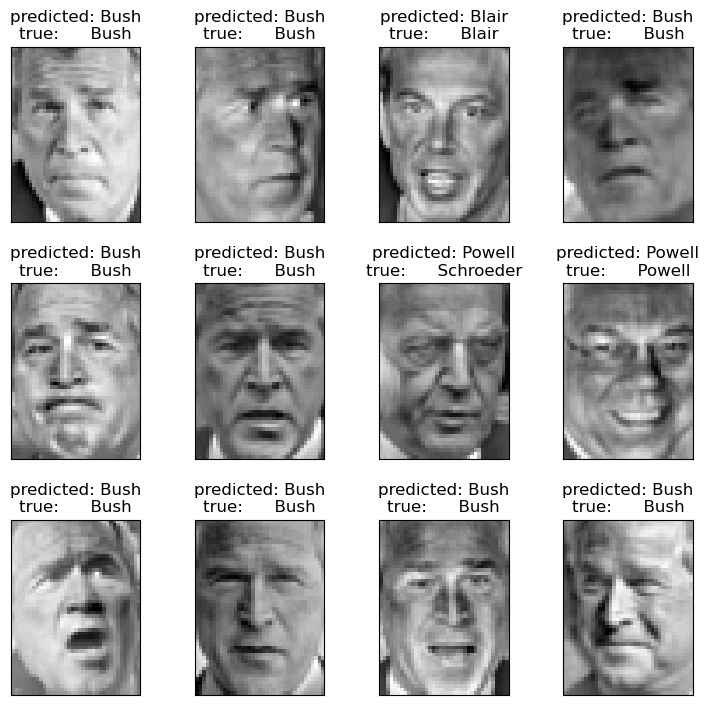

In [10]:
## 显示预测结果
import matplotlib.pyplot as plt

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return f'predicted: {pred_name}\ntrue:      {true_name}'

prediction_titles = [title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)
plt.show()